# Prevendo as lutas do UFC

In [54]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [55]:
# Carregando o dataset
df_init = pd.read_csv("data.csv", sep = ',')   

In [56]:
df_init.shape

(5144, 145)

In [57]:
df_init.isnull().sum()

R_fighter         0
B_fighter         0
Referee          23
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     316
R_Weight_lbs      3
B_age           172
R_age            64
Length: 145, dtype: int64

In [58]:
df = df_init[['Winner','B_Height_cms','R_Height_cms', 'B_Reach_cms','R_Reach_cms','B_Weight_lbs','R_Weight_lbs','B_wins','R_wins','B_losses','R_losses']].copy()


In [59]:
df.isnull().sum()

Winner            0
B_Height_cms      8
R_Height_cms      4
B_Reach_cms     666
R_Reach_cms     316
B_Weight_lbs      6
R_Weight_lbs      3
B_wins            0
R_wins            0
B_losses          0
R_losses          0
dtype: int64

In [60]:
df.dropna(inplace = True)
df.isnull().values.any()


False

In [61]:
print(df.columns.values)

['Winner' 'B_Height_cms' 'R_Height_cms' 'B_Reach_cms' 'R_Reach_cms'
 'B_Weight_lbs' 'R_Weight_lbs' 'B_wins' 'R_wins' 'B_losses' 'R_losses']


In [62]:
df.shape

(4401, 11)

In [63]:
ganhador=[]
velho=[]
maior=[]
amplitude=[]
pesado=[]
vitorias=[]
derrotas=[]
tempo=[]
titulo=[]
cor=[]
blue=0
red = 0
draw = 0
for index, row in df.iterrows():
    if row['Winner']=='Blue':
        blue +=1
        cor.append(0)
        cor.append(1)
        ganhador.append(1)
        ganhador.append(0)
       
        if row['B_Height_cms'] > row['R_Height_cms']:
            maior.append(1)
            maior.append(0)
        else:
            maior.append(0)
            maior.append(1)
        if row['B_Reach_cms'] > row['R_Reach_cms']:
            amplitude.append(1)
            amplitude.append(0)
        else:
            amplitude.append(0)
            amplitude.append(1)
        if row['B_Weight_lbs'] > row['R_Weight_lbs']:
            pesado.append(1)
            pesado.append(0)
        else:
            pesado.append(0)
            pesado.append(1)
        if row['B_wins'] > row['R_wins']:
            vitorias.append(1)
            vitorias.append(0)
        else:
            vitorias.append(0)
            vitorias.append(1)
        if row['B_losses'] > row['R_losses']:
            derrotas.append(1)
            derrotas.append(0)
        else:
            derrotas.append(0)
            derrotas.append(1)
        
    elif row['Winner']=='Red':
        red+=1
        cor.append(0)
        cor.append(1)
        ganhador.append(0)
        ganhador.append(1)
        
        if row['B_Height_cms'] > row['R_Height_cms']:
            maior.append(1)
            maior.append(0)
        else:
            maior.append(0)
            maior.append(1)
        if row['B_Reach_cms'] > row['R_Reach_cms']:
            amplitude.append(1)
            amplitude.append(0)
        else:
            amplitude.append(0)
            amplitude.append(1)
        if row['B_Weight_lbs'] > row['R_Weight_lbs']:
            pesado.append(1)
            pesado.append(0)
        else:
            pesado.append(0)
            pesado.append(1)
        if row['B_wins'] > row['R_wins']:
            vitorias.append(1)
            vitorias.append(0)
        else:
            vitorias.append(0)
            vitorias.append(1)
        if row['B_losses'] > row['R_losses']:
            derrotas.append(1)
            derrotas.append(0)
        else:
            derrotas.append(0)
            derrotas.append(1)
        
    else:
        draw+=1
        
        
df = data = {'ganhador':  ganhador,
        'maior': maior,
        'amplitude': amplitude,
        'pesado': pesado,
        'vitorias': vitorias,
        'derrotas': derrotas,
        'cor':cor
        
        }

df = pd.DataFrame (data, columns = ['ganhador','maior','amplitude','pesado','vitorias','derrotas','cor']) 


In [64]:

df.head()

,ganhador,maior,amplitude,pesado,vitorias,derrotas,cor
0,0,1,1,0,0,0,0
1,1,0,0,1,1,1,1
2,0,1,0,0,0,1,0
3,1,0,1,1,1,0,1
4,0,1,0,0,1,1,0


## Definindo a Baseline

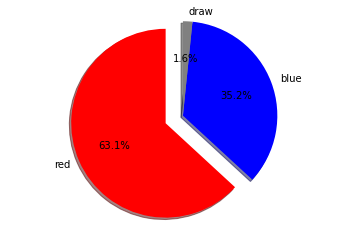

In [65]:
#definindo a baseline
def plot_pie(df):
    labels = 'red', 'blue','draw'
    sizes = [red, blue, draw]
    explode = (0.2, 0, 0)
    colors = ['red','blue','gray']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal') 
plot_pie(df)

In [66]:
# Identificando a correlação entre as variáveis
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

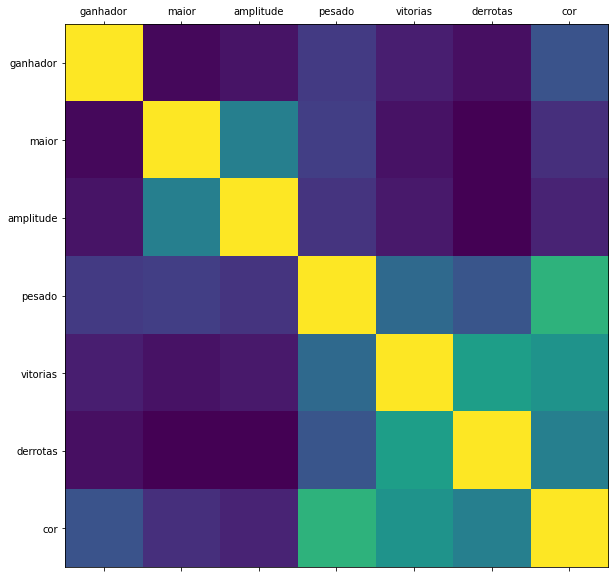

In [67]:
# Criando o gráfico
plot_corr(df)

In [68]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,ganhador,maior,amplitude,pesado,vitorias,derrotas,cor
ganhador,1.000000,0.059122,0.089607,0.201848,0.119169,0.075289,0.283603
maior,0.059122,1.000000,0.453118,0.216166,0.084527,0.040647,0.164896
amplitude,0.089607,0.453118,1.000000,0.181062,0.101155,0.036952,0.133487
pesado,0.201848,0.216166,0.181062,1.000000,0.367667,0.292379,0.660508
vitorias,0.119169,0.084527,0.101155,0.367667,1.000000,0.577367,0.532564
derrotas,0.075289,0.040647,0.036952,0.292379,0.577367,1.000000,0.454503
cor,0.283603,0.164896,0.133487,0.660508,0.532564,0.454503,1.000000


In [69]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['ganhador'] == True])
num_false = len(df.loc[df['ganhador'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 4330 (50.00%)
Número de Casos Falsos     : 4330 (50.00%)


## Spliting

70% para dados de treino e 30% para dados de teste

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Seleção de variáveis (Feature Selection)
atributos = ['maior','amplitude','pesado','vitorias','derrotas','cor']

In [72]:
# previsão
atrib_prev = ['ganhador']


In [73]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values
X_test = df[atributos].values
Y_test = df[atrib_prev].values

In [74]:
X

array([[1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0],
       ...,
       [1, 1, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1]], dtype=int64)

In [75]:
Y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [95]:
# Definindo a taxa de split
split_test_size = 0.20

In [96]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [97]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

80.00% nos dados de treino
20.00% nos dados de teste


In [98]:
X_treino

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0]], dtype=int64)

## Construindo e treinando o modelo Naive Bayes

In [99]:
# Utilizando um classificador Naive Bayes
from sklearn.neural_network import MLPClassifier

In [100]:
# Criando o modelo preditivo
modelo_v1 = MLPClassifier()

In [101]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Verificando a exatidão no modelo nos dados de treino

In [102]:
from sklearn import metrics

In [103]:
nb_predict_train = modelo_v1.predict(X_treino)

In [104]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.6423



## Verificando a exatidão no modelo nos dados de teste

In [105]:
nb_predict_test = modelo_v1.predict(X_teste)

In [106]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.6397



## Métricas

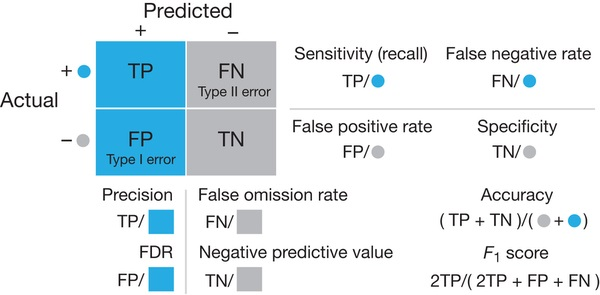

In [107]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [108]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[562 298]
 [326 546]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       860
           0       0.65      0.63      0.64       872

    accuracy                           0.64      1732
   macro avg       0.64      0.64      0.64      1732
weighted avg       0.64      0.64      0.64      1732



# Otimizando o modelo com RandomForest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [110]:
modelo_v2 = RandomForestClassifier(max_depth=3,random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.6423


In [112]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.6397



In [113]:
print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       860
           0       0.65      0.63      0.64       872

    accuracy                           0.64      1732
   macro avg       0.64      0.64      0.64      1732
weighted avg       0.64      0.64      0.64      1732



In [114]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(df.columns, modelo_v2.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name            score
derrotas   0.625854
amplitude  0.224917
pesado     0.0831127
maior      0.0426458
vitorias   0.0147268
ganhador   0.00874368


In [115]:
scores = cross_val_score(estimator=modelo_v2,X=X, y=Y, cv=3,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


'AUC 0.65 +/- 0.09'

In [116]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[562 298]
 [326 546]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       860
           0       0.65      0.63      0.64       872

    accuracy                           0.64      1732
   macro avg       0.64      0.64      0.64      1732
weighted avg       0.64      0.64      0.64      1732



## SVM

In [117]:
from sklearn import svm

In [118]:
# Terceira versão do modelo usando decision tree
modelo_v3 = svm.SVC(random_state=0)
modelo_v3.fit(X_treino, Y_treino.ravel())
dt_predict_test = modelo_v3.predict(X_teste)

In [119]:
# Verificando os dados de treino
dt_predict_train = modelo_v3.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, dt_predict_train)))

Exatidão (Accuracy): 0.6423


In [120]:
# Verificando nos dados de teste
dt_predict_test = modelo_v3.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, dt_predict_test)))
print()

Exatidão (Accuracy): 0.6397



In [121]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, dt_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, dt_predict_test, labels = [1, 0]))

Confusion Matrix
[[562 298]
 [326 546]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       860
           0       0.65      0.63      0.64       872

    accuracy                           0.64      1732
   macro avg       0.64      0.64      0.64      1732
weighted avg       0.64      0.64      0.64      1732



## Tunando os Hyperparamentos

In [122]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_treino, Y_treino.ravel()) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.662, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.630, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.647, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.662, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.630, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.647, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.635, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.662, total=   1.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.630, total=   1.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.647, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.635, total=   1.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.637, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.662, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.630, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [54]:
# Verificando nos dados de teste
grid_predictions = grid.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, grid_predictions)))
print()

Exatidão (Accuracy): 0.6486



In [55]:
# print classification report 
print(metrics.classification_report(Y_teste, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1293
           1       0.65      0.65      0.65      1305

    accuracy                           0.65      2598
   macro avg       0.65      0.65      0.65      2598
weighted avg       0.65      0.65      0.65      2598



In [56]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, grid_predictions, labels = [1, 0])))
print("")

Confusion Matrix
[[848 457]
 [456 837]]



In [57]:
scores = cross_val_score(estimator=modelo_v3,X=X, y=Y, cv=3,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished


'AUC 0.62 +/- 0.07'

## Xgboost

In [58]:
import xgboost as xgb

In [59]:
# quarta versão do modelo usando xgboost
modelo_v4 = xgb.XGBClassifier(n_estimators=15)
modelo_v4.fit(X_treino, Y_treino.ravel())
xg_predict_test = modelo_v4.predict(X_teste)

In [60]:
# Verificando os dados de treino
xg_predict_train = modelo_v4.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, xg_predict_train)))

Exatidão (Accuracy): 0.6389


In [61]:
# Verificando nos dados de teste
xg_predict_test = modelo_v4.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, xg_predict_test)))
print()

Exatidão (Accuracy): 0.6486



In [62]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, xg_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, xg_predict_test, labels = [1, 0]))

Confusion Matrix
[[848 457]
 [456 837]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.65      0.65      1305
           0       0.65      0.65      0.65      1293

    accuracy                           0.65      2598
   macro avg       0.65      0.65      0.65      2598
weighted avg       0.65      0.65      0.65      2598



In [63]:
### Resumindo
## Exatidão nos dados de teste

# Baseline (Red)  = 0.6310

# Modelo usando algoritmo Naive Bayes         = 0.6372
# Modelo usando algoritmo Random Forest       = 0.6430
# Modelo usando algoritmo SVC                 = 0.6430
# Modelo usando algoritmo Xgboost             = 0.6430

## Fazendo Previsões Com o Modelo Treinado

In [64]:
import pickle

In [65]:
# Salvando o modelo para usar mais tarde
filename = 'site_prob.sav'
pickle.dump(modelo_v1, open(filename, 'wb'))

In [66]:
X_teste

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]], dtype=int64)

In [75]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict_proba(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict_proba(X_teste[14].reshape(1, -1))
print(Y_teste[15])
print(resultado1)
print(Y_teste[14])
print(resultado2)


[0]
[[0.67713486 0.32286514]]
[0]
[[0.63031708 0.36968292]]
